In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ideal_gas_MC(N,L,T,steps):
    '''Function to perform Monte Carlo simulation of ideal gas'''
    
    coeff=(np.pi**2/(2.*L**2))
    
    # Array for quantum numbers, intialized to all ones
    n=np.ones([N,3])
    
    # Initial energy, all in ground state
    E=3*N*coeff
    
    # Get all random numbers at the start
    rand_at=np.random.randint(0,high=N,size=steps)
    rand_n=np.random.randint(0,high=3,size=steps)
    rand_pm=np.random.randint(0,high=2,size=steps)
    rand_accept=np.random.rand(steps)
    
    
    engs=[]
    # Loop over steps
    for step in range(steps):
        
        # Select random numbers
        at=rand_at[step]
        ni=rand_n[step]
        pm=rand_pm[step]
        accept=rand_accept[step]
        
        # Apply random move if we are not trying to move below the ground state
        if n[at,ni]>1 or pm==0:
            dE=coeff*(((-1)**pm)*2*n[at,ni]+1)
            
            # Should we accept the move?
            if accept < np.exp(-dE/T):
                n[at,ni] += (-1)**pm
                E+=dE
    
        engs.append(E)

    return engs       
    


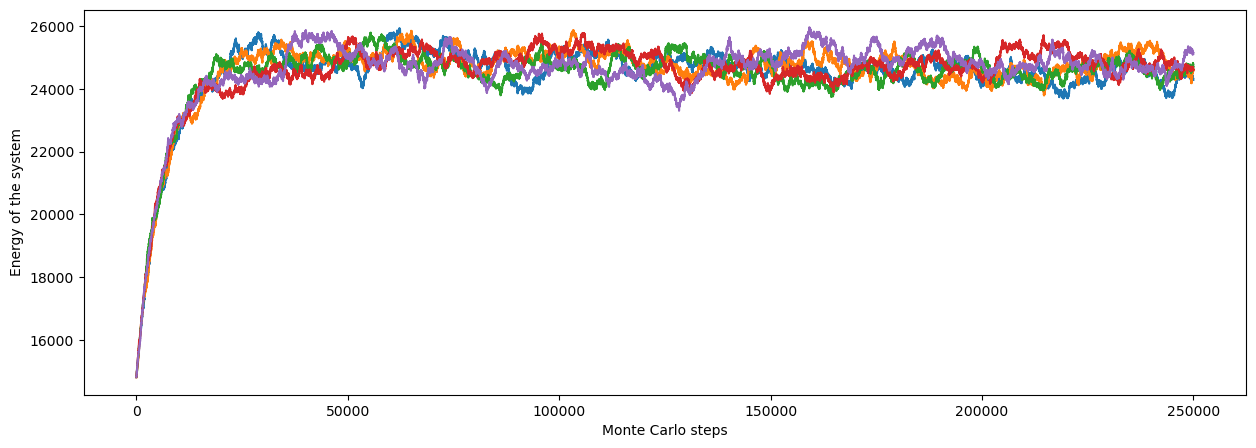

In [3]:
# Parameters
N=1000 # Number of particles
T=10.0 # Temperature in k_B
steps=250000 # Monte Carlo steps
L=1.


# Plot
fig,ax=plt.subplots(figsize=(15,5))
ax.set_xlabel('Monte Carlo steps')
ax.set_ylabel('Energy of the system')


# Let's do several runs
for run in range(5):
    engs=ideal_gas_MC(N,L,T,steps)
    ax.plot(engs)

    
plt.savefig('mc_ideal_gas.pdf',bbox_inches='tight')
plt.show()

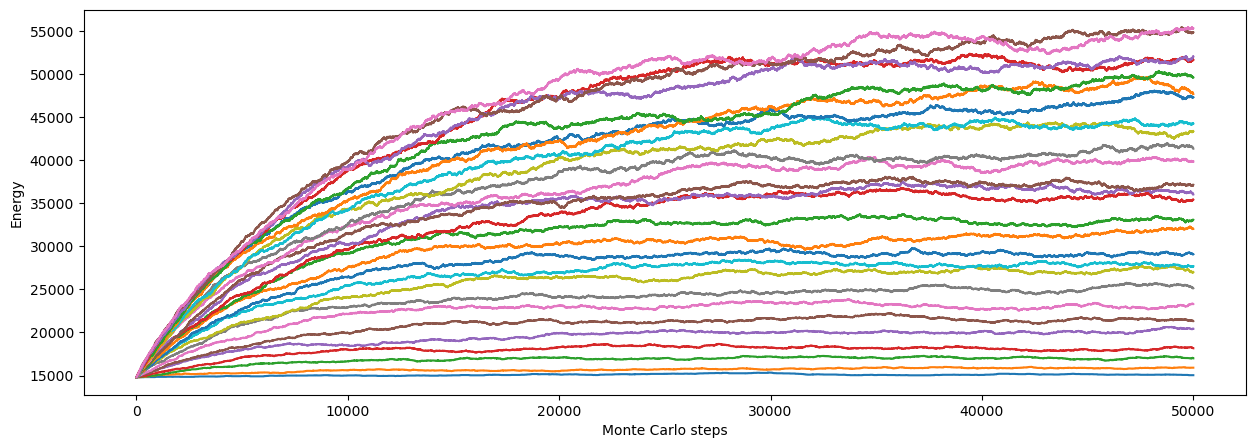

In [4]:
# Make plot for different temperatures

# Parameters
N=1000 # Number of particles
steps=50000 # Monte Carlo steps
L=1.

# Plot
fig,ax=plt.subplots(figsize=(15,5))
ax.set_xlabel('Monte Carlo steps')
ax.set_ylabel('Energy')

for T in range(3,30):
    engs=ideal_gas_MC(N,L,T,steps)
    ax.plot(engs,label=str(T))  
    
#ax.legend()

plt.savefig('mc_ideal_gas_Ts.pdf',bbox_inches='tight')
plt.show()

E versus T = 1636.2996693472185


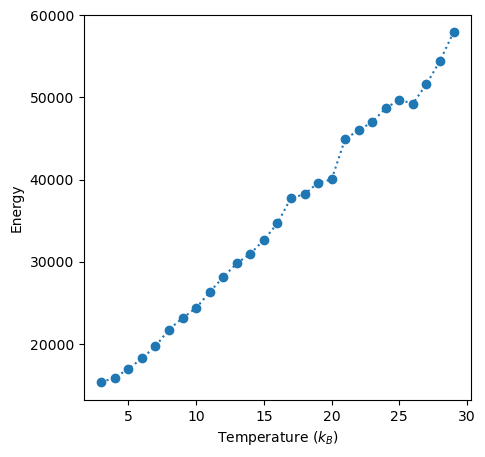

In [5]:
# Make plot of energy versus temperature 

# Parameters
N=1000 # Number of particles
steps=50000 # Monte Carlo steps
L=1.

# Let's do several runs
eng_vs_T=[]
for T in range(3,30):
    engs=ideal_gas_MC(N,L,T,steps)
    eng_vs_T.append([T,engs[-1]])
    
    

eng_vs_T=np.stack(eng_vs_T)
# Plot
fig,ax=plt.subplots(figsize=(5,5))
ax.set_xlabel('Temperature ($k_B$)')
ax.set_ylabel('Energy')
    
ax.plot(eng_vs_T[:,0],eng_vs_T[:,1],'o:')    

fit=np.polyfit(eng_vs_T[:,0],eng_vs_T[:,1],1)
print('E versus T =',fit[0])

plt.savefig('mc_ideal_gas_EvT.pdf',bbox_inches='tight')
plt.show()